In [1]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
from nltk.corpus import stopwords

#!conda install -y imbalanced-learn
#Are we analysing the larger 'big' corpus of reviews or the cleaner, 5-core set?
dobig=0
#Cell #2 or Cell#3 only will work, so this notebook is safe to run every cell in order though some will error out depending on what value is set here

In [ ]:
#Review Large corpus
#cause this cell to fail if not dobig
#create 1 file for every doc for some of the loading functions to work
if not dobig:
   raise SystemExit("Cell not required if dobig=", dobig)
import gzip
import simplejson

def parse(filename):
  f = open(filename, 'r')
  entry = {}
  for l in f:
    l = l.strip()
    colonPos = l.find(':')
    if colonPos == -1:
      yield entry
      entry = {}
      continue
    eName = l[:colonPos]
    rest = l[colonPos+2:]
    entry[eName] = rest
  yield entry

#Build the amazon json data for instruments into the format for sklearn.datasets.load_files
import json
import sys, os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
datadir="C:\\Users\\DellAdmin\\Documents\\TUD course\\Data Mining\\Assignment2\\Text Mining\\databig"

all_reviews=[]
path=os.path.join(datadir, "out")
if not os.path.exists(path): 
    os.mkdir(path)
for rate in ['1.0','2.0', '3.0', '4.0', '5.0']:
   path2 = os.path.join(datadir, "out", rate)
   if not os.path.exists(path2): 
      os.mkdir(path2)

revcount=0


    

df = pd.DataFrame({'reviewNo':[], 'rating': [], 'reviewText':[]})
all_reviews=[]
for rev in parse('C:\\Users\\DellAdmin\\Documents\\TUD course\\Data Mining\\Assignment2\\Text Mining\\data\\Musical_Instruments.txt'):
  # print (simplejson.dumps(e))
   try:
     rate=rev['review/score']
     text=rev['review/text']
   except:
      pass
   df.loc[len(df.index)] = [revcount, float(rate), text]
   revcount+=1
   fname= '.'.join([ str(revcount),'txt'] )
   all_reviews.append(rev)
   path2 = os.path.join(datadir, "out",rate, fname )
   if not os.path.exists(path2):
      with open(path2, "w") as f:
        f.write(text)

In [2]:
#Build the amazon json data for instruments into the format for sklearn.datasets.load_files
#Review Small corpus
#create 1 file for every doc for some of the loading functions to work
#cause this cell to fail if dobig

if dobig:
    raise SystemExit("Cell not required if dobig=", dobig)
import json
import sys, os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
datadir="C:\\Users\\DellAdmin\\Documents\\TUD course\\Data Mining\\Assignment2\\Text Mining\\data"
f=open("C:\\Users\\DellAdmin\\Documents\\TUD course\\Data Mining\\Assignment2\\Text Mining\\Musical_Instruments_5.json", encoding='utf-8')
reviews=f.readlines()
f.close()
all_reviews=[]
path=os.path.join(datadir, "out")
if not os.path.exists(path): 
    os.mkdir(path)
for rate in ['1.0','2.0', '3.0', '4.0', '5.0']:
   path2 = os.path.join(datadir, "out", rate)
   if not os.path.exists(path2): 
      os.mkdir(path2)

revcount=0
df = pd.DataFrame({'reviewNo':[], 'rating': [], 'reviewText':[]})
for revstr in reviews:
   rev=json.loads(revstr) 
   all_reviews.append(rev)
   rate=str(rev['overall'])
   #remove blank reviews (shortest seen is just "excellent" )
   if len(rev['reviewText']) <3: 
           print (f"no review data for {revcount} {rate}")
           print (rev['reviewText'])
           continue
   df.loc[len(df.index)] = [revcount, float(rate), rev['reviewText']]
    
   revcount+=1
   fname= '.'.join([ str(revcount),'txt'] )

   path2 = os.path.join(datadir, "out",rate, fname )
   if not os.path.exists(path2):
    with open(path2, "w") as f:
      f.write(rev['reviewText'])



no review data for 2927 5.0

no review data for 4400 4.0

no review data for 8737 5.0

no review data for 9172 5.0

no review data for 9302 5.0

no review data for 9308 5.0

no review data for 9336 5.0



In [3]:
print("number of reviews is:", len(all_reviews))

number of reviews is: 10261


reviewNo    0.000000
rating     -2.032024
dtype: float64


C:\Users\DellAdmin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


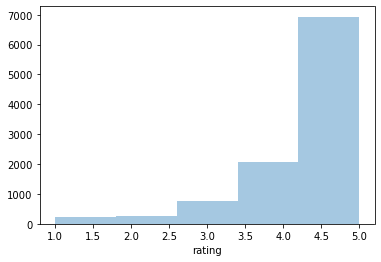

In [4]:
sns.distplot(df['rating'], kde=False, bins=5)
print(df.skew(axis=0))
plt.savefig('rating_chart.png')

In [5]:
df.describe()

,reviewNo,rating
count,10254.000000,10254.000000
mean,5126.500000,4.488492
std,2960.219164,0.894849
min,0.000000,1.000000
25%,2563.250000,4.000000
50%,5126.500000,5.000000
75%,7689.750000,5.000000
max,10253.000000,5.000000


In [6]:
#download and print the stop words for the English language
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


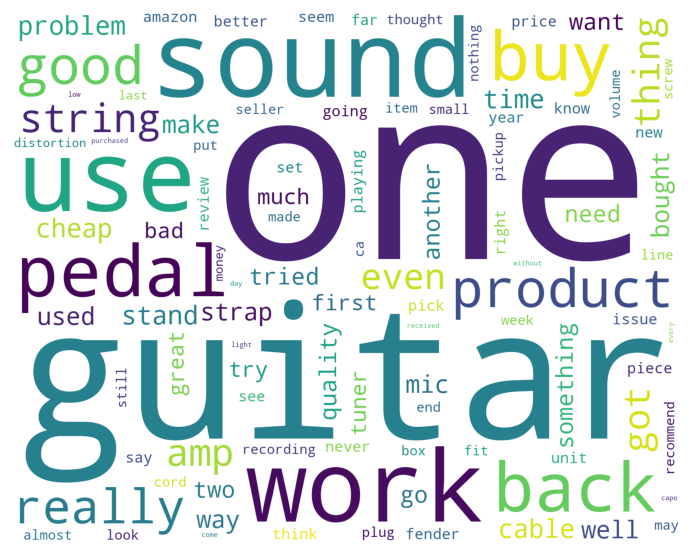

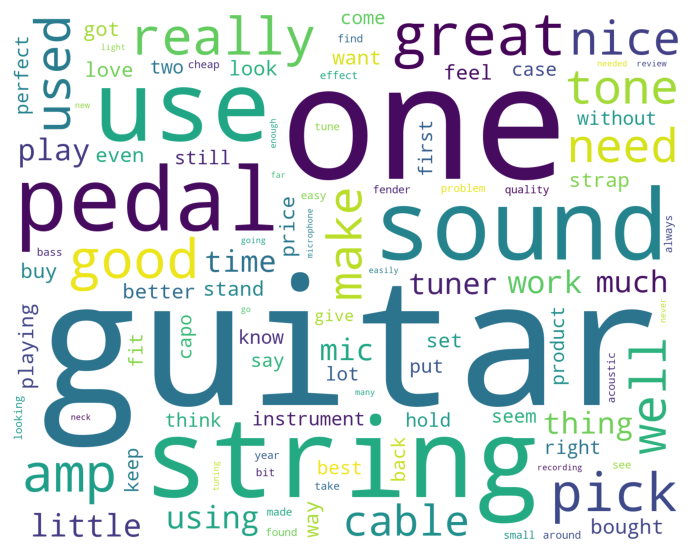

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#wordcloud for bad rating (1)

text="\n".join(df.loc[df['rating'] ==1.0]['reviewText'])

#tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize
#df[df.]
words = word_tokenize(text)
#print(words)

# removes punctuation and numbers
wordsFiltered = [word.lower() for word in words if word.isalpha()]
#print(wordsFiltered)

# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stopwords.words('english')]
#print(filtered_words)

wc = WordCloud(max_words=100, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(filtered_words))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file("wordcloud_bad.png")
#wordcloud for good rating (5)
text="\n".join(df.loc[df['rating'] ==5.0]['reviewText'])

#tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize
#df[df.]
words = word_tokenize(text)
#print(words)

# removes punctuation and numbers
wordsFiltered = [word.lower() for word in words if word.isalpha()]
#print(wordsFiltered)

# remove stop words from tokenised data set
filtered_words = [word for word in wordsFiltered if word not in stopwords.words('english')]
#print(filtered_words)

wc = WordCloud(max_words=100, margin=10, background_color='white',
               scale=3, relative_scaling = 0.5, width=500, height=400,
               random_state=1).generate(' '.join(filtered_words))

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

wc.to_file("wordcloud_good.png")



In [8]:
#This dataset will allow use to perform a type of Sentiment Analysis Classification
#source_file_dir = r"C:\Users\DellAdmin\Documents\TUD course\Data Mining\Assignment2\Text Mining\aclImdb\train"
source_file_dir = r"C:\Users\DellAdmin\Documents\TUD course\Data Mining\Assignment2\Text Mining\data\out"
if dobig:
   source_file_dir = r"C:\Users\DellAdmin\Documents\TUD course\Data Mining\Assignment2\Text Mining\databig\out"

#The load_files function automatically divides the dataset into data and target sets.
#load_files  will treat each folder inside the folder as one category 
#  and all the documents inside that folder will be assigned its corresponding category.
movie_data = load_files(source_file_dir)
X, y = movie_data.data, movie_data.target

#load_files  function loads the data from both "neg" and "pos" folders into the X variable, 
#  while the target categories are stored in y

In [9]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

#transform list of documents (X) to be more compute friendly and combine semantically identical potantial words
#Array output is of same length and order as X
#y contains the categories
for sen in range(0, len(X)):
    # Remove all the special characters, numbers, punctuation 
    document = re.sub(r'[\d\W]+', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start of document with a space
    document = re.sub(r'^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [10]:
# Function to run generic classifier - for models which use a classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from numpy import sqrt 
import sklearn
import sklearn.naive_bayes
def classify(classifier, X_train, X_test, y_train, y_test):

    classifier.fit(X_train, y_train)

    #Now label/classify the Test DS
    y_pred = classifier.predict(X_test)

    #Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    
    l=[ x*x for x in y_pred-y_test]
    tot=0
    for i in l:
        tot+=i
    print( "average rms error is: %f" % sqrt(tot/len(l)))
    return classifier

In [11]:
# Cell performs the feature selection (3000 is best for small data set, 1500 for medium due to memory constraints)
from sklearn.feature_extraction.text import CountVectorizer
#experiment with a number of different models by commenting/uncommentig the relevant here
#extract vocab, any workds occirng in 5 or more reviews, but less than 70%.  Extract N most frequent words
#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7,stop_words=stopwords.words('english'),

#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, ngram_range=(1, 1), stop_words=stopwords.words('english'),
#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, ngram_range=(1, 4),stop_words=[],
#vectorizer = CountVectorizer(max_features=500, min_df=5, max_df=0.7, ngram_range=(1, 2),stop_words=[],
#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7,stop_words=[],
#vectorizer = CountVectorizer(max_features=2000, min_df=5, max_df=0.7, ngram_range=(1, 2),stop_words=[],
#vectorizer = CountVectorizer(max_features=8192, min_df=5, max_df=0.7, ngram_range=(1, 2),stop_words=[],
#vectorizer = CountVectorizer(max_features=200, min_df=5, max_df=0.7, ngram_range=(1, 2),stop_words=[],
#vectorizer = CountVectorizer(max_features=8192, min_df=5, max_df=0.7, ngram_range=(1, 2),stop_words=[],
#vectorizer = CountVectorizer(max_features=3000, min_df=5, max_df=0.7, ngram_range=(1, 1),stop_words=[],
#vectorizer = CountVectorizer(max_features=100, min_df=5, max_df=0.7,  stop_words=stopwords.words('english')   ,      
#vectorizer = CountVectorizer(max_features=200, min_df=5, max_df=0.7,  stop_words=stopwords.words('english')   ,    
#vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7,  ngram_range=(1, 2),#stop_words=stopwords.words('english')   , 
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, ngram_range=(1, 2),stop_words=[],
strip_accents='unicode'
)
X = vectorizer.fit_transform(documents).toarray()

from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

<AxesSubplot:xlabel='features'>

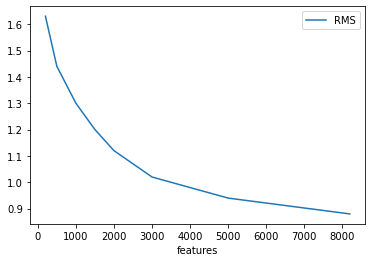

In [12]:
#quick plot of values as n increases, manually copied from above runs on small data set
quickResults= pd.DataFrame({'features':
                            [200, 500, 1000, 1500, 2000, 3000, 5000, 8192], 'RMS': 
                            [1.63, 1.44, 1.30, 1.20, 1.12, 1.02, 0.94, 0.88  ]})
quickResults.plot(x="features", y="RMS")


In [13]:
#split into train and test. Oversample reviews scores with fewer examples
from sklearn.model_selection import train_test_split
#!conda install -y imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
X_train_in, X_test, y_train_in, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#Train DS = 70%
#Test DS = 30%


# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='not majority', random_state=2)
# fit and apply the transform
X_train, y_train = oversample.fit_resample(X_train_in,y_train_in)

Accuracy: 0.5496434448710916
[[ 131   11   12   10    5]
 [  18  134   36   19    6]
 [  39   50  295  106   72]
 [  27   45  164  219  171]
 [  77   97  244  433 1225]]
average rms error is: 1.203966


C:\Users\DellAdmin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

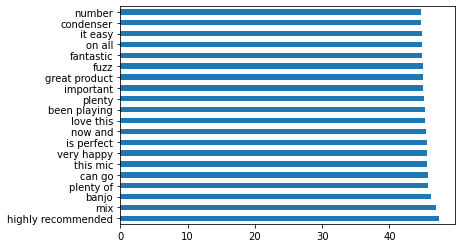

In [14]:
#Fits number of features and some of the transforms such as stop word removal and ngrams are all evaluated with NB model
c=sklearn.naive_bayes.MultinomialNB()

#with small numbers of features (200 for example, ngrams hinder the selection) as does leaving stopwords in
#with large numbers of features, ngrams and stopwords being left in helps
c=classify(c , X_train, X_test, y_train, y_test)
features=abs(c.coef_[0])+abs(c.coef_[1])+abs(c.coef_[2])+abs(c.coef_[3])+abs(c.coef_[4])
pd.Series(features, index=vectorizer.get_feature_names()).nlargest(20).plot(kind='barh')


In [15]:
#First advanced model SVC (too slow with medium data set)
from sklearn import svm
if not dobig:

  svm = svm.SVC(gamma=0.001, C=100., kernel = 'linear')
  c=classify(svm , X_train, X_test, y_train, y_test)




Accuracy: 0.6357652221612726
[[ 155    3    0    4    7]
 [   6  188    9    4    6]
 [   6    7  482   46   21]
 [  19   26  140  202  239]
 [  38   52  222  473 1291]]
average rms error is: 0.978092


In [16]:
#Import Random Forest Model
#Use RandomForest algorithm to create a model
#n_estimators = number of trees in the Forest

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=40, random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=0)

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
classifier_nb.predict(X_test)

array([4, 2, 4, ..., 1, 1, 2])

In [18]:
#Now label/classify the Test DS
y_pred = classifier_nb.predict(X_test)

#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

from numpy import sqrt 
l=[ x*x for x in y_pred-y_test]
tot=0
for i in l:
    tot+=i
print( "average rms error is: %f" % sqrt(tot/len(l)))

Accuracy: 0.44843664289632473
[[153   6   3   3   4]
 [ 40 142  17   6   8]
 [137  83 210  87  45]
 [ 88 101 138 157 142]
 [286 221 253 343 973]]
              precision    recall  f1-score   support

           0       0.22      0.91      0.35       169
           1       0.26      0.67      0.37       213
           2       0.34      0.37      0.36       562
           3       0.26      0.25      0.26       626
           4       0.83      0.47      0.60      2076

    accuracy                           0.45      3646
   macro avg       0.38      0.53      0.39      3646
weighted avg       0.60      0.45      0.48      3646

average rms error is: 1.701537


In [30]:
#Cant do multi-class ROC
#from sklearn.metrics import roc_curve
#y_score=classifier_nb.predict_proba(X_test)
#print(y_score[0:10])##
#
#for i in range(0,4):
#  y_true=y_test
#  roc_curve(y_true, y_score)
#  print(y_true[0:10])

In [21]:
#Now label/classify the Test DS
y_pred = classifier_rf.predict(X_test)

#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))


from numpy import sqrt 
l=[ x*x for x in y_pred-y_test]
tot=0
for i in l:
    tot+=i
print( "average rms error is: %f" % sqrt(tot/len(l)))

Accuracy: 0.772078990674712
[[ 141    0    0    2   26]
 [   0  179    3    6   25]
 [   0    0  448   10  104]
 [   1    0   13   55  557]
 [   0    0   15   69 1992]]
average rms error is: 0.706525


In [22]:
len(X_train)

24280

In [23]:
classify(classifier_nb, X_train, X_test, y_train, y_test)

Accuracy: 0.44843664289632473
[[153   6   3   3   4]
 [ 40 142  17   6   8]
 [137  83 210  87  45]
 [ 88 101 138 157 142]
 [286 221 253 343 973]]
average rms error is: 1.701537


GaussianNB()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
classify(neigh, X_train, X_test, y_train, y_test)

Accuracy: 0.5200219418540867
[[149   3  12   2   3]
 [  3 190   2   9   9]
 [  7  17 433  60  45]
 [ 24  59 134 233 176]
 [ 74 157 368 586 891]]
average rms error is: 1.276502


KNeighborsClassifier()

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
classify(clf, X_train, X_test, y_train, y_test)

Accuracy: 0.6017553483269337
[[ 137   11    7    7    7]
 [   4  150   37   10   12]
 [  23   32  348   81   78]
 [  27   34  120  219  226]
 [  64   78  183  411 1340]]
average rms error is: 1.112686


GradientBoostingClassifier(random_state=0)

In [26]:
sklearn.__version__

'0.24.1'

In [27]:

c=sklearn.naive_bayes.MultinomialNB()
#dont remove stop words
#average rms error is: 1.225739
#remopving stop words
#average rms error is: 1.236424
c=classify(c , X_train, X_test, y_train, y_test)


Accuracy: 0.5496434448710916
[[ 131   11   12   10    5]
 [  18  134   36   19    6]
 [  39   50  295  106   72]
 [  27   45  164  219  171]
 [  77   97  244  433 1225]]
average rms error is: 1.203966


In [29]:
c=sklearn.linear_model.LogisticRegression(max_iter=500)
c=classify(c , X_train, X_test, y_train, y_test)

Accuracy: 0.6176631925397696
[[ 157    1    7    2    2]
 [   4  184   14    7    4]
 [  13   32  370  109   38]
 [  24   32  149  240  181]
 [  68   83  186  438 1301]]
average rms error is: 1.072905
